### **0. Set-up**

In [22]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [23]:
# Load NL predicted gpt-3.5-turbo-0125
raw_gpt_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f5.csv")

# Load NL predicted text-embedding-3-large
raw_emb_pred = pd.read_csv("../../../../data/text-embedding-3-large/nl.csv")

In [24]:
# Show results
raw_gpt_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk,zeer ongelijk
1,slim,intelligent,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk,gelijk
2,hard,moeilijk,neutraal,ongelijk,neutraal,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,gelijk,neutraal,ongelijk,ongelijk,ongelijk
3,gelukkig,vrolijk,gelijk,gelijk,ongelijk,gelijk,ongelijk,ongelijk,neutraal,ongelijk,gelijk,gelijk,neutraal,gelijk,neutraal,gelijk,gelijk
4,hard,stoer,neutraal,gelijk,ongelijk,ongelijk,ongelijk,gelijk,zeer ongelijk,ongelijk,ongelijk,neutraal,ongelijk,ongelijk,ongelijk,ongelijk,neutraal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk
993,sturen,bijwonen,zeer ongelijk,ongelijk,ongelijk,ongelijk,neutraal,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,ongelijk,zeer ongelijk
994,verzamelen,bijwonen,gelijk,neutraal,gelijk,ongelijk,gelijk,ongelijk,ongelijk,ongelijk,gelijk,ongelijk,gelijk,zeer gelijk,ongelijk,ongelijk,ongelijk
995,opnemen,intrekken,ongelijk,ongelijk,ongelijk,ongelijk,gelijk,ongelijk,ongelijk,ongelijk,zeer ongelijk,ongelijk,gelijk,ongelijk,ongelijk,ongelijk,ongelijk


In [25]:
# Show results
raw_emb_pred

,word1,word2,similarity_score
0,oud,nieuw,0.40
1,slim,intelligent,0.26
2,hard,moeilijk,0.36
3,gelukkig,vrolijk,0.73
4,hard,stoer,0.41
...,...,...,...
992,samenvoegen,verwerven,0.42
993,sturen,bijwonen,0.39
994,verzamelen,bijwonen,0.39
995,opnemen,intrekken,0.49


### **1. Data Processing**

In [26]:
# Copy dataframe
gpt_pred = raw_gpt_pred.copy()

# List of columns to scale
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Mapping of categorical scale
categorical_mapping = {
    'zeer ongelijk': 0,
    'ongelijk': 2.5,
    'neutraal': 5,
    'gelijk': 7.5,
    'zeer gelijk': 10
}

# Apply mapping
for col in similarity_cols:
    gpt_pred[col] = gpt_pred[col].map(categorical_mapping)

# Calculate the mean SimLex-999
gpt_pred['gpt_pred_sl'] = gpt_pred[similarity_cols].mean(axis=1).round(2)

# Select columns
gpt_pred = gpt_pred[['word1', 'word2', 'gpt_pred_sl']]

# Show results
gpt_pred

,word1,word2,gpt_pred_sl
0,oud,nieuw,0.00
1,slim,intelligent,7.50
2,hard,moeilijk,3.33
3,gelukkig,vrolijk,5.67
4,hard,stoer,3.50
...,...,...,...
992,samenvoegen,verwerven,2.50
993,sturen,bijwonen,2.33
994,verzamelen,bijwonen,4.83
995,opnemen,intrekken,3.00


In [27]:
# Copy dataframe
emb_pred = raw_emb_pred.copy()

# Normalize cosine similarity to to 0-10 scale
emb_pred['scaled_similarity_score'] = 5 * (emb_pred['similarity_score'] + 1)

# Rename columns
emb_pred = emb_pred.rename(columns={'scaled_similarity_score': 'emb_pred_sl'})

# Select columns
emb_pred = emb_pred[['word1', 'word2', 'emb_pred_sl']]

# Show results
emb_pred

,word1,word2,emb_pred_sl
0,oud,nieuw,7.00
1,slim,intelligent,6.30
2,hard,moeilijk,6.80
3,gelukkig,vrolijk,8.65
4,hard,stoer,7.05
...,...,...,...
992,samenvoegen,verwerven,7.10
993,sturen,bijwonen,6.95
994,verzamelen,bijwonen,6.95
995,opnemen,intrekken,7.45


In [28]:
# Concatenate DataFrames
conc = pd.concat([gpt_pred, emb_pred], axis=1)

# Show results
conc

,word1,word2,gpt_pred_sl,word1,word2,emb_pred_sl
0,oud,nieuw,0.00,oud,nieuw,7.00
1,slim,intelligent,7.50,slim,intelligent,6.30
2,hard,moeilijk,3.33,hard,moeilijk,6.80
3,gelukkig,vrolijk,5.67,gelukkig,vrolijk,8.65
4,hard,stoer,3.50,hard,stoer,7.05
...,...,...,...,...,...,...
992,samenvoegen,verwerven,2.50,samenvoegen,verwerven,7.10
993,sturen,bijwonen,2.33,sturen,bijwonen,6.95
994,verzamelen,bijwonen,4.83,verzamelen,bijwonen,6.95
995,opnemen,intrekken,3.00,opnemen,intrekken,7.45


### **2. Descriptive Statistics**

In [29]:
# Summary statistics SimLex-999
gpt_pred_sl_summary = round(gpt_pred['gpt_pred_sl'].describe(), 2)
emb_pred_sl_summary = round(emb_pred['emb_pred_sl'].describe(), 2)

# Add median SimLex-999
gpt_pred_sl_summary['median'] = round(gpt_pred['gpt_pred_sl'].median(), 2)
emb_pred_sl_summary['median'] = round(emb_pred['emb_pred_sl'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "gpt_pred_sl": gpt_pred_sl_summary,
    "emb_pred_sl": emb_pred_sl_summary,
})

# Show results
summary_df

,gpt_pred_sl,emb_pred_sl
count,997.00,997.00
mean,4.36,7.19
std,2.22,0.67
min,0.00,5.55
25%,2.67,6.70
50%,4.00,7.15
75%,6.50,7.60
max,8.83,9.80
median,4.00,7.15


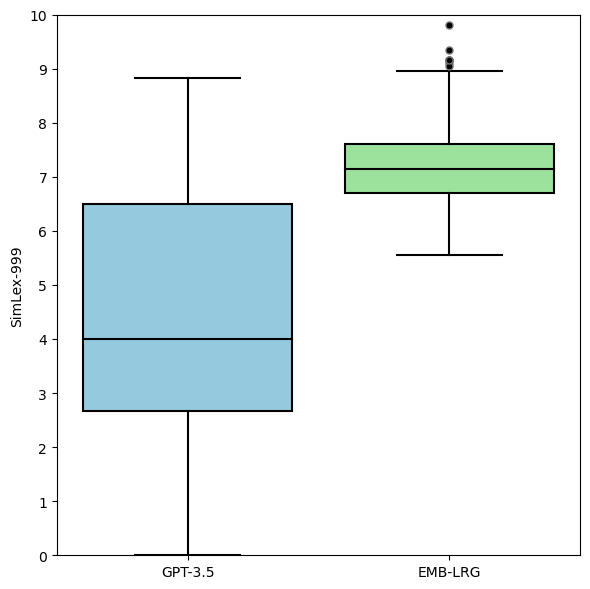

In [30]:
# Rename columns and copy
renamed_gpt_pred_sl = gpt_pred.rename(columns={"gpt_pred_sl": "SimLex-999"}).copy()
renamed_emb_pred_sl = emb_pred.rename(columns={"emb_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_gpt_pred_sl['Score'] = 'GPT-3.5'
renamed_emb_pred_sl['Score'] = 'EMB-LRG'

# Combine DataFrames
combined_data = pd.concat([renamed_gpt_pred_sl, renamed_emb_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

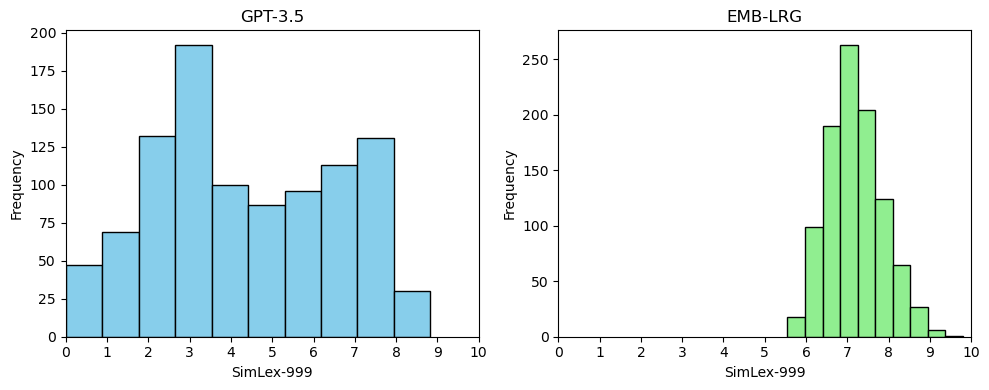

In [31]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_gpt_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('GPT-3.5')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_emb_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EMB-LRG')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. GPT**

In [32]:
# Count outliers
print_outlier_counts(gpt_pred)

No outliers found in columns: gpt_pred_sl


In [33]:
# Row outliers
print_outlier_data(gpt_pred, 'gpt_pred_sl')

No outliers found in gpt_pred_sl


#### **4.2. EMB**

In [34]:
# Count outliers
print_outlier_counts(emb_pred)

Outliers in emb_pred_sl: 7


In [35]:
# Row outliers
print_outlier_data(emb_pred, 'emb_pred_sl')


Outliers in emb_pred_sl:
            word1        word2  emb_pred_sl
109    echtgenote   echtgenoot         9.80
125       actrice       acteur         9.10
234       bedrijf  onderneming         9.15
383   onderneming      bedrijf         9.15
569  gelukkigheid        geluk         9.35
665          buik    onderbuik         9.05
838     deelnemen      meedoen         9.15


#### **4.3. Add to Summary**

In [36]:
# Calculate outliers
outliers_gpt_pred_sl = calculate_outliers(gpt_pred, 'gpt_pred_sl')
outliers_emb_pred_sl = calculate_outliers(emb_pred, 'emb_pred_sl')

# Count outliers
count_outliers_gpt_pred_sl = outliers_gpt_pred_sl.shape[0]
count_outliers_emb_pred_sl = outliers_emb_pred_sl.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_gpt_pred_sl, count_outliers_emb_pred_sl], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,gpt_pred_sl,emb_pred_sl
count,997.00,997.00
mean,4.36,7.19
std,2.22,0.67
min,0.00,5.55
25%,2.67,6.70
50%,4.00,7.15
75%,6.50,7.60
max,8.83,9.80
median,4.00,7.15
outliers,0.00,7.00


### **5. Evaluation Metrics**

#### **5.1. Spearmans's Rank Correlation**

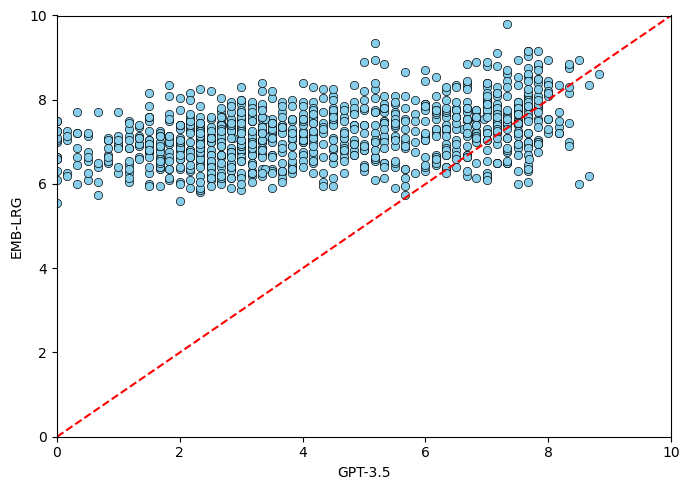

In [37]:
# Scatter plot
plot_scatter_plot(conc, 'gpt_pred_sl', 'emb_pred_sl', 'GPT-3.5', 'EMB-LRG', 0, 10, 0, 10)

In [38]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'gpt_pred_sl', 'emb_pred_sl')

Spearman's Rank correlation: 0.37919
P-value: 1.9146938533546754e-35
The correlation is statistically significant.



#### **5.2. Mean Square Error (MSE)**

In [39]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['gpt_pred_sl'], conc['emb_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 12.20


#### **5.3. Mean Absolute Error (MAE)**

In [40]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['gpt_pred_sl'], conc['emb_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.94
